In [2]:
import calim
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import pickle
import pandas as pd
import numpy as np

from scipy.optimize import curve_fit
import scipy 
from scipy.stats import sem

color_palette = sns.color_palette("colorblind")
sns.set_theme(palette=color_palette, font="Arial", font_scale=1.0, style="white")

# number of iterations and seed for bootstrapping during calculation of confidence intervals
n_boot = 10000
seed = 10

In [3]:
#styles for error and markers in sns.lineplot

thin_custom_lw = 1.2
custom_lw = thin_custom_lw/0.65

filled_marker_style = dict(marker='o',  markersize=5,
                           color='k',
                           markerfacecolor='w',
                           markeredgecolor='k',
                          markeredgewidth=thin_custom_lw)

filled_marker_style_white = dict(marker='o',  markersize=5,
                           color='w',
                           markerfacecolor='w',
                           markeredgecolor='w',
                          markeredgewidth=custom_lw)
######################

error_style_white = {"capsize": 4.4, 
                "ecolor": "w",
               "barsabove":False, 
               "elinewidth":custom_lw, 
               "capthick":custom_lw,
                    "zorder": 8}

error_style = {"capsize": 4, 
                "ecolor": "k",
                "barsabove":False, 
                "elinewidth":thin_custom_lw, 
                "capthick":thin_custom_lw,
                "zorder": 9}


In [4]:
data = pd.read_csv("doppel_perf_fura_bbCa.csv", index_col="Unnamed: 0")

Text(-1.7, -20, 'Blocker')

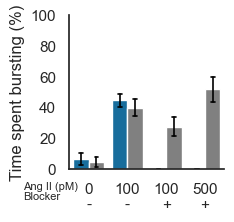

In [5]:
#time spend in burst during last 4 min of condition
fig, g = plt.subplots(figsize=(2, 2))

x_cat = "pos"
#x_label = "[Isradipine] (nM)"
y_cat = "percentage_time_burst"
#y_label = "Mean baseline Ca$^{2+}$ (nM)"


g = sns.barplot(x=x_cat, y=y_cat, data=data, hue="ctrl", 
                hue_order=["n", "y"],dodge=True, 
               errorbar=("ci",95),
             n_boot=n_boot, seed=seed,
               capsize=0.1, 
                errcolor="k",
                errwidth=thin_custom_lw,
               palette=[color_palette[0], "grey"])



g.spines['right'].set_visible(False)
g.spines['top'].set_visible(False)

plt.legend([],[], frameon=False)
g.set_xticklabels(["0\n-", "100\n-", "100\n+", "500\n+"])
g.set_ylim([0,100])
g.set_ylabel("Time spent bursting (%)")
g.set_xlabel("")

plt.text(-1.7, -13, "Ang II (pM)", ha="left", size=8)
plt.text(-1.7, -20, "Blocker", ha="left", size=8)
